In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math
%matplotlib inline


In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
# gets all column names and returns index object
cols = confirmed_df.keys()

In [5]:
# returns only the dates columns
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

# gets date information from columns in an index object
dates = confirmed.keys()

In [6]:
# gets total current tallies and also creates list of daily statistics
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []
active_cases = []

for i in dates:
    # the .sum() function adds all values in axis, i.e. daily stats
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    active_cases_tot = confirmed_sum - (death_sum + recovered_sum)
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    active_cases.append(active_cases_tot)

In [7]:
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
active_cases = np.array(active_cases).reshape(-1, 1)

In [8]:
world_cases = pd.DataFrame(world_cases, index=dates, columns = ['World Cases'])
total_deaths = pd.DataFrame(total_deaths, index=dates, columns = ['Total Deaths'])
total_recovered = pd.DataFrame(total_recovered, index=dates, columns = ['Total Recoveries'])
mortality_rate = pd.DataFrame(mortality_rate, index=dates, columns = ['Cumulative Mortality Rate'])
active_cases = pd.DataFrame(active_cases, index=dates, columns = ['Active Cases'])

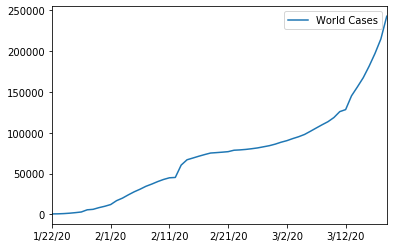

In [9]:
world_cases.plot(kind='line')

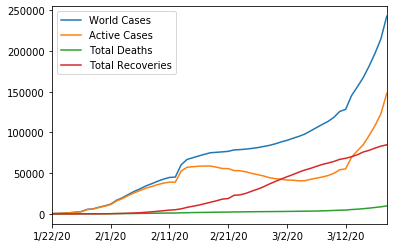

In [10]:
pd.concat([world_cases, active_cases, total_deaths, total_recovered], axis=1).plot()

In [11]:
# new cases per day
new_cases_daily = world_cases
new_cases_daily.rename(columns={'World Cases': 'New Cases'}, inplace=True)
new_cases_daily = new_cases_daily.diff(axis=0)
new_cases_daily.fillna(555, inplace=True)

In [12]:
new_cases_daily['New Cases'] = new_cases_daily['New Cases'].astype(int)

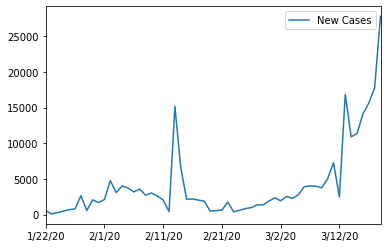

In [13]:
new_cases_daily.plot(kind='line')

In [14]:
new_deaths_daily = total_deaths
new_deaths_daily.rename(columns={'Total Deaths': 'New Deaths'}, inplace=True)
new_deaths_daily = new_deaths_daily.diff(axis=0)
new_deaths_daily.fillna(17, inplace=True)

In [15]:
new_deaths_daily['New Deaths'] = new_deaths_daily['New Deaths'].astype(int)

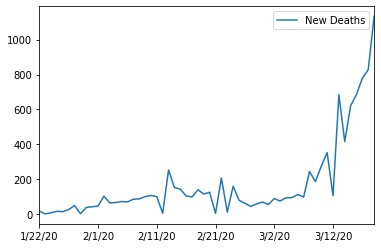

In [16]:
new_deaths_daily.plot(kind='line')

In [17]:
new_recoveries_daily = total_recovered
new_recoveries_daily.rename(columns={'Total Recoveries': 'New Recoveries'}, inplace=True)
new_recoveries_daily = new_recoveries_daily.diff(axis=0)
new_recoveries_daily.fillna(28, inplace=True)

In [18]:
new_recoveries_daily['New Recoveries'] = new_recoveries_daily['New Recoveries'].astype(int)

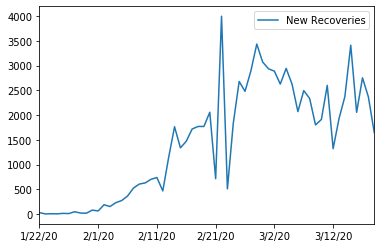

In [19]:
new_recoveries_daily.plot(kind='line')

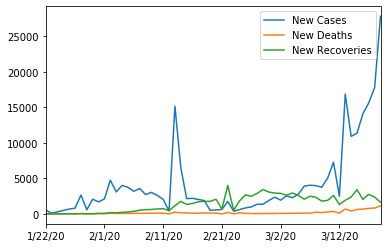

In [20]:
pd.concat([new_cases_daily, new_deaths_daily, new_recoveries_daily], axis=1).plot()

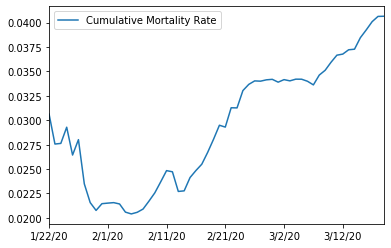

In [21]:
mortality_rate.plot(kind='line')

In [22]:
confirmed_by_country = confirmed_df.drop(['Province/State', 'Lat', 'Long'], axis=1)
deaths_by_country = deaths_df.drop(['Province/State', 'Lat', 'Long'], axis=1)
recoveries_by_country = recoveries_df.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [23]:
# gets list of all countries with cases
countries = confirmed_by_country['Country/Region'].unique()
print(len(countries))

155


In [24]:
confirmed_by_country = confirmed_by_country.groupby(['Country/Region']).sum()
deaths_by_country = deaths_by_country.groupby(['Country/Region']).sum()
recoveries_by_country = recoveries_by_country.groupby(['Country/Region']).sum()

In [25]:
confirmed_by_country

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,8,29,50,79
Uzbekistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,10,15,23
Venezuela,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,17,33,36,42


In [26]:
confirmed_by_country = confirmed_by_country.swapaxes('index', 'columns')
deaths_by_country = deaths_by_country.swapaxes('index', 'columns')
recoveries_by_country = recoveries_by_country.swapaxes('index', 'columns')

In [27]:
# renames the index
confirmed_by_country.index.names = ['Dates']

In [28]:
confirmed_by_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cruise Ship,Cuba,Cyprus,Czechia,Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Estonia,Eswatini,...,Nicaragua,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia
Dates,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,1,0,0,0,0,0,0,2,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,2,0,0,0,0,0,0,2,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,2,0,0,0,0,0,0,2,0
1/26/20,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,5,0,0,0,0,0,0,2,0


In [29]:
italy_cum = pd.concat([confirmed_by_country['Italy'], deaths_by_country['Italy'], recoveries_by_country['Italy']], axis=1)
italy_cum.columns = ['Italian Confirmed Cases', 'Italian Deaths', 'Italian Recoveries']
italy_cum['Italian Morality Rate'] = italy_cum['Italian Deaths'] / italy_cum['Italian Confirmed Cases']
italy_cum.dropna(inplace=True)

# adds new column days_since_detection
days_since_detection = len(italy_cum.index.get_level_values(0))
days_since_detection = np.array([i for i in range(days_since_detection)]).reshape(-1, 1)
italy_cum['Days Since Detection'] = days_since_detection
italy_cum.set_index('Days Since Detection', inplace=True)

In [30]:
usa_cum = pd.concat([confirmed_by_country['US'], deaths_by_country['US'], recoveries_by_country['US']], axis=1)
usa_cum.columns = ['American Confirmed Cases', 'American Deaths', 'American Recoveries']
usa_cum['American Morality Rate'] = usa_cum['American Deaths'] / usa_cum['American Confirmed Cases']
usa_cum.dropna(inplace=True)

# adds new column days_since_detection
days_since_detection = len(usa_cum.index.get_level_values(0))
days_since_detection = np.array([i for i in range(days_since_detection)]).reshape(-1, 1)
usa_cum['Days Since Detection'] = days_since_detection
usa_cum.set_index('Days Since Detection', inplace=True)

In [31]:
china_cum = pd.concat([confirmed_by_country['China'], deaths_by_country['China'], recoveries_by_country['China']], axis=1)
china_cum.columns = ['Chinese Confirmed Cases', 'Chinese Deaths', 'Chinese Recoveries']
china_cum['Chinese Morality Rate'] = china_cum['Chinese Deaths'] / china_cum['Chinese Confirmed Cases']
china_cum.dropna(inplace=True)

# adds new column days_since_detection
days_since_detection = len(china_cum.index.get_level_values(0))
days_since_detection = np.array([i for i in range(days_since_detection)]).reshape(-1, 1)
china_cum['Days Since Detection'] = days_since_detection
china_cum.set_index('Days Since Detection', inplace=True)

In [32]:
sk_cum = pd.concat([confirmed_by_country['Korea, South'], deaths_by_country['Korea, South'], recoveries_by_country['Korea, South']], axis=1)
sk_cum.columns = ['South Korean Confirmed Cases', 'South Korean Deaths', 'South Korean Recoveries']
sk_cum['South Korean Morality Rate'] = sk_cum['South Korean Deaths'] / sk_cum['South Korean Confirmed Cases']
sk_cum.dropna(inplace=True)

# adds new column days_since_detection
days_since_detection = len(sk_cum.index.get_level_values(0))
days_since_detection = np.array([i for i in range(days_since_detection)]).reshape(-1, 1)
sk_cum['Days Since Detection'] = days_since_detection
sk_cum.set_index('Days Since Detection', inplace=True)

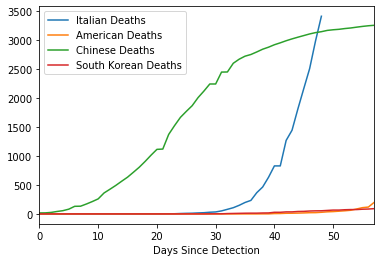

In [33]:
pd.concat([italy_cum['Italian Deaths'], usa_cum['American Deaths'], china_cum['Chinese Deaths'], sk_cum['South Korean Deaths']], axis=1).plot()

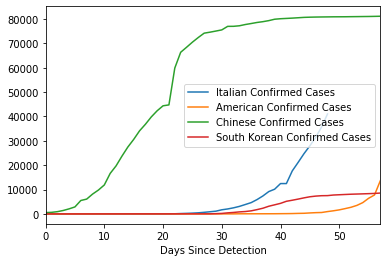

In [34]:
pd.concat([italy_cum['Italian Confirmed Cases'], usa_cum['American Confirmed Cases'], china_cum['Chinese Confirmed Cases'], sk_cum['South Korean Confirmed Cases']], axis=1).plot()

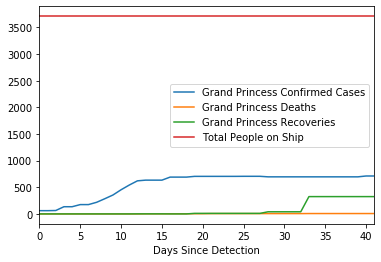

In [35]:
cruise_cum = pd.concat([confirmed_by_country['Cruise Ship'], deaths_by_country['Cruise Ship'], recoveries_by_country['Cruise Ship']], axis=1)
cruise_cum.columns = ['Grand Princess Confirmed Cases', 'Grand Princess Deaths', 'Grand Princess Recoveries']
cruise_cum['Grand Princess Mortality Rate'] = cruise_cum['Grand Princess Deaths'] / cruise_cum['Grand Princess Confirmed Cases']
cruise_cum.dropna(inplace=True)
cruise_cum.drop(['Grand Princess Mortality Rate'], axis=1, inplace=True)

# adds new column days_since_detection
days_since_detection = len(cruise_cum.index.get_level_values(0))
days_since_detection = np.array([i for i in range(days_since_detection)]).reshape(-1, 1)
cruise_cum['Days Since Detection'] = days_since_detection
cruise_cum.set_index('Days Since Detection', inplace=True)

cruise_cum['Total People on Ship'] = 3711

cruise_cum.plot()

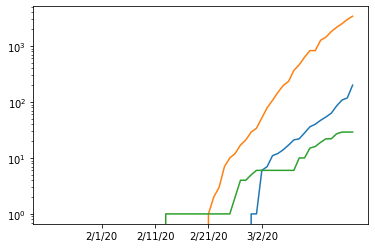

In [36]:
compare = pd.concat([deaths_by_country['US'], deaths_by_country['Italy'], deaths_by_country['Japan']], axis=1)

plt.plot(compare)
plt.yscale('log')
plt.xticks(np.arange(10,50, step=10))
plt.show()

In [37]:
import io
import requests
url="https://covidtracking.com/api/us/daily.csv"
s=requests.get(url).content
usa_detail = pd.read_csv(io.StringIO(s.decode('utf-8')))
usa_detail.fillna(0, downcast='infer', inplace=True)
usa_detail.drop(['date', 'states', 'negative', 'pending', 'total'], axis=1, inplace=True)
usa_detail.index.names = ['Days Since Detection']
usa_detail.rename(columns={'positive': 'American Confirmed', 'posNeg': 'American Tested', 'death': 'American Deaths'}, inplace=True)

In [38]:
sk_detail_time = pd.read_csv('https://raw.githubusercontent.com/jihoo-kim/Data-Science-for-COVID-19/master/dataset/Time/Time.csv')
sk_detail_time.drop(['date', 'time', 'negative', 'released'], axis=1, inplace=True)
sk_detail_time.index.names = ['Days Since Detection']
sk_detail_time.rename(columns={'test': 'SK Tested', 'confirmed': 'SK Confirmed', 'deceased': 'SK Deaths'}, inplace=True)

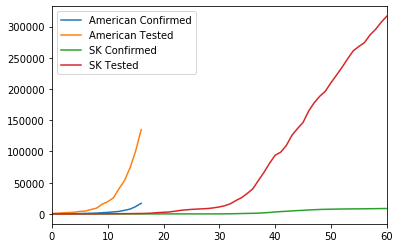

In [39]:
pd.concat([usa_detail['American Confirmed'], usa_detail['American Tested'], sk_detail_time['SK Confirmed'], sk_detail_time['SK Tested']], axis=1).plot()

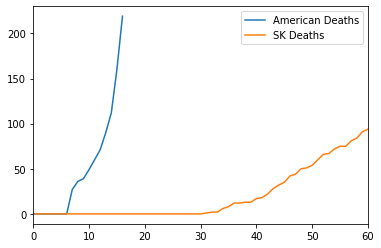

In [40]:
pd.concat([usa_detail['American Deaths'], sk_detail_time['SK Deaths']], axis=1).plot()

In [41]:
sk_detail_patient = pd.read_csv('https://raw.githubusercontent.com/jihoo-kim/Data-Science-for-COVID-19/master/dataset/Patient/PatientInfo.csv')
sk_detail_patient

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,6100000085,NaN,male,1990.0,30s,Korea,Gyeongsangnam-do,Changwon-si,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-16,NaN,NaN,NaN
2214,7000000001,139.0,male,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,87.0,NaN,2020-02-20,NaN,NaN,isolated
2215,7000000002,222.0,female,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,84.0,NaN,2020-02-22,2020-03-07,NaN,released
2216,7000000003,4345.0,female,1972.0,40s,Korea,Jeju-do,etc,NaN,etc,NaN,NaN,21.0,NaN,2020-03-02,2020-03-15,NaN,released


In [42]:
sk_detail_patient = sk_detail_patient[['sex', 'age', 'state']]
sk_detail_patient.fillna('unknown', inplace=True)

sk_detail_patient = pd.get_dummies(sk_detail_patient, columns=['state'])
sk_detail_patient

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


,sex,age,state_deceased,state_isolated,state_released,state_unknown
0,male,50s,0,0,1,0
1,male,30s,0,0,1,0
2,male,50s,0,0,1,0
3,male,20s,0,0,1,0
4,female,20s,0,0,1,0
...,...,...,...,...,...,...
2213,male,30s,0,0,0,1
2214,male,20s,0,1,0,0
2215,female,20s,0,0,1,0
2216,female,40s,0,0,1,0


In [43]:
#g = sk_detail_patient.groupby(['age', 'sex'])
#g = g.sort_values(['age', 'sex'])
#g

In [44]:
# use demographic data to find correlations

demo = pd.read_csv('./consolidated_data.csv')
demo

,index,Population,Density_(km2),Area_(km2),Migrants_(net),MedianAge,Urban_(%),WorldShare_(%),GDP_per_capita_PPP,GNI_per_capita_PPP,passengers_per_day,CountryID,Latitude,Longitude,Last_(Celsius),Previous_(Celsius),TempRecordDate
0,Afghanistan,38928346.0,60.0,652860.0,-62920.0,18.0,25.0,0.0050,1976.0,1970.0,5287.0,AF,33.939110,67.709953,2.88,7.73,Dec/15
1,Albania,2877797.0,105.0,27400.0,-14000.0,36.0,63.0,0.0004,12943.0,13350.0,415.0,AL,41.153332,20.168331,3.89,9.29,Dec/15
2,Algeria,43851044.0,18.0,2381740.0,-10000.0,29.0,73.0,0.0056,15293.0,14970.0,16194.0,DZ,28.033886,1.659626,13.35,18.21,Dec/15
3,Andorra,77265.0,164.0,470.0,NaN,NaN,88.0,0.0000,NaN,NaN,NaN,AD,42.546245,1.601554,7.08,9.76,Dec/15
4,Angola,32866272.0,26.0,1246700.0,6413.0,17.0,67.0,0.0042,6658.0,6170.0,3409.0,AO,-11.202692,17.873887,23.52,23.43,Dec/15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,"Venezuela, Bolivarian Republic of",28435940.0,32.0,882050.0,-653249.0,30.0,NaN,0.0036,NaN,17900.0,17690.0,VE,6.423750,-66.589730,26.52,26.96,Dec/15
192,Viet Nam,97338579.0,314.0,310070.0,-80000.0,32.0,38.0,0.0125,6790.0,6930.0,82040.0,VN,14.058324,108.277199,22.08,24.76,Dec/15
193,Yemen,29825964.0,56.0,527970.0,-30000.0,20.0,38.0,0.0038,2606.0,3800.0,3802.0,YE,15.552727,48.516388,20.15,22.22,Dec/15
194,Zambia,18383955.0,25.0,743390.0,-8000.0,18.0,45.0,0.0024,4033.0,4100.0,32.0,ZM,-13.133897,27.849332,25.21,25.41,Dec/15


In [45]:
# recoveries_by_country.plot.bar(stacked=True)